In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Part A – Data Exploration
df = pd.read_csv("Titanic-Dataset.csv")
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
print(df.info)
print(df.describe())

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [17]:
# Check missing values
print(df.isnull().sum())

# Handle missing values
df['Age'].fillna(df['Age'].mean())
df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify again
print(df.isnull().sum())

print("Total passengers:", len(df))
print("Average Age:", df['Age'].mean())
print("Average Fare:", df['Fare'].mean())
print("Males:", sum(df['Sex'] == 'male'))
print("Females:", sum(df['Sex'] == 'female'))


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
Total passengers: 891
Average Age: 29.69911764705882
Average Fare: 32.204207968574636
Males: 577
Females: 314


In [20]:
# Part B – Data Analysis
# Survival by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Survival by Class:\n", survival_by_class)

# Survival by age group
def age_group(age):
    if age <= 12:
        return "Child"
    elif 13 <= age <= 19:
        return "Teen"
    elif 20 <= age <= 40:
        return "Adult"
    else:
        return "Senior"

df['AgeGroup'] = df['Age'].apply(age_group)
survival_by_age = df.groupby('AgeGroup')['Survived'].mean()
print("Survival by Age Group:\n", survival_by_age)




Survival by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survival by Age Group:
 AgeGroup
Adult     0.360485
Child     0.579710
Senior    0.366667
Teen      0.410526
Name: Survived, dtype: float64


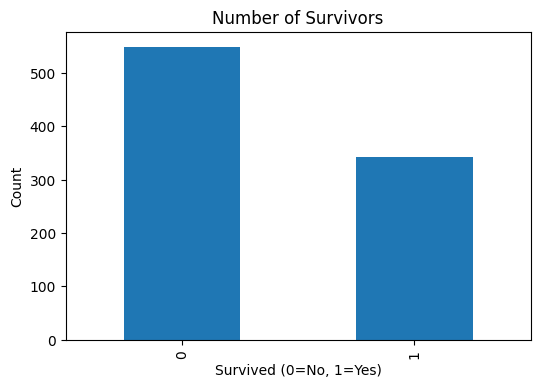

In [21]:
# Part C – Visualization
plt.figure(figsize=(6,4))
df['Survived'].value_counts().plot(kind='bar')
plt.title("Number of Survivors")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


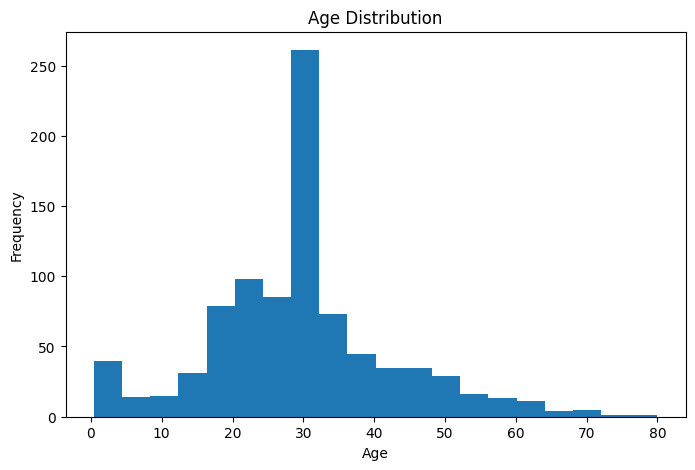

In [22]:
plt.figure(figsize=(8,5))
df['Age'].plot(kind='hist', bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


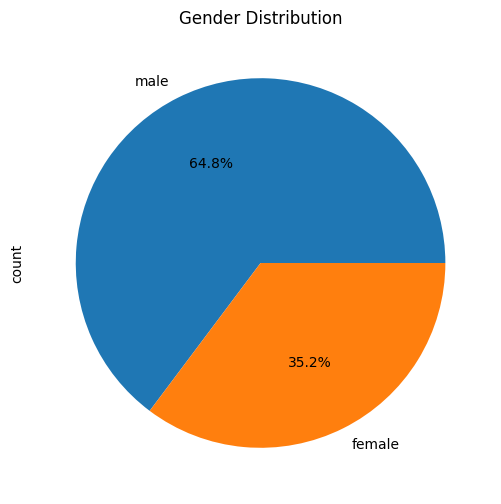

In [23]:
plt.figure(figsize=(6,6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()


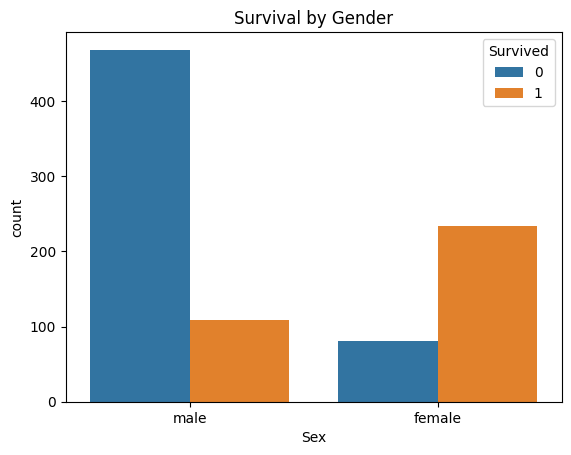

In [24]:
# Seaborn plots
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

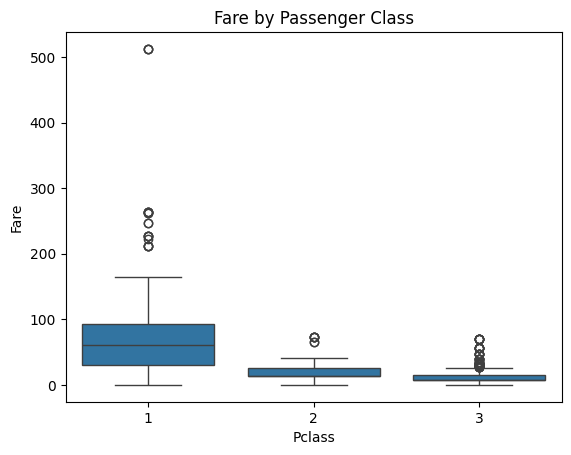

In [25]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()


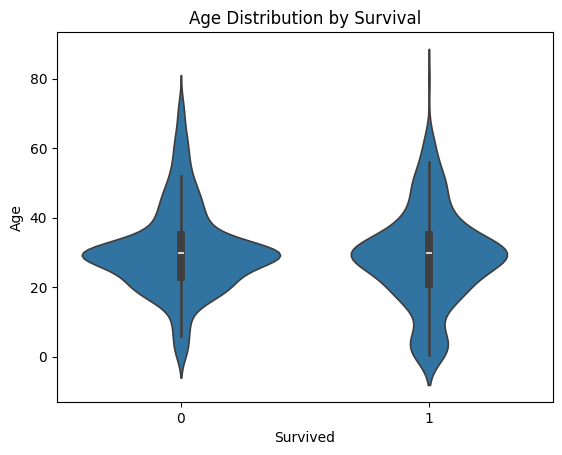

In [26]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


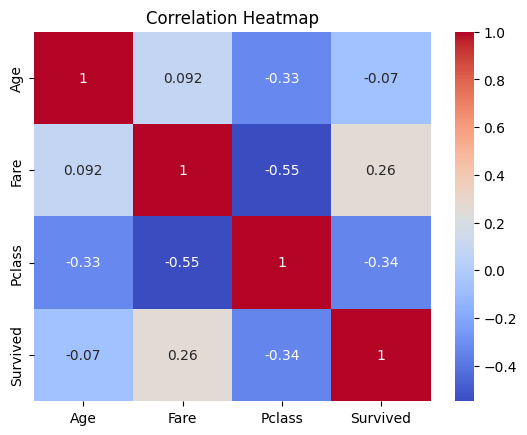

In [27]:
sns.heatmap(df[['Age','Fare','Pclass','Survived']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [30]:
# Part D – Probability Concepts
# Empirical probability
p_survived = survival_by_class[1] / len(df)
p_female_survived = df[df['Sex']=='female']['Survived'].mean()
p_male_survived = df[df['Sex']=='male']['Survived'].mean()

print("P(Survived):", p_survived)
print("P(Female Survived):", p_female_survived)
print("P(Male Survived):", p_male_survived)
print("P(Survival by Class):\n", df.groupby('Pclass')['Survived'].mean())

# Theoretical probability assumptions
print("Theoretical P(Survived): 0.5")
print("Theoretical P(Class): ~0.33 each")
print("Theoretical Gender Effect: None")



P(Survived): 0.000706655027642682
P(Female Survived): 0.7420382165605095
P(Male Survived): 0.18890814558058924
P(Survival by Class):
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Theoretical P(Survived): 0.5
Theoretical P(Class): ~0.33 each
Theoretical Gender Effect: None


In [31]:
# Part E – Insights
print("1. Women had a significantly higher survival rate than men.")
print("2. 1st class passengers had the best chance of survival, 3rd class the worst.")
print("3. Children had a higher chance of survival compared to adults and seniors.")
print("4. Higher fare (wealthier passengers) was positively correlated with survival.")
print("5. Empirical probabilities show clear biases by gender, class, and age, unlike theoretical assumptions of fairness.")
print("6. Survival was not random – social and economic factors strongly influenced outcomes.")

1. Women had a significantly higher survival rate than men.
2. 1st class passengers had the best chance of survival, 3rd class the worst.
3. Children had a higher chance of survival compared to adults and seniors.
4. Higher fare (wealthier passengers) was positively correlated with survival.
5. Empirical probabilities show clear biases by gender, class, and age, unlike theoretical assumptions of fairness.
6. Survival was not random – social and economic factors strongly influenced outcomes.
